In [1]:
!conda env list
!touch image_processing.ipynb
!pwd

# conda environments:
#
kaggle2017            *  /Users/szalmaf/anaconda/envs/kaggle2017
kaggle2017-2.7           /Users/szalmaf/anaconda/envs/kaggle2017-2.7
py36                     /Users/szalmaf/anaconda/envs/py36
root                     /Users/szalmaf/anaconda

/Users/szalmaf/Documents/GitHub/Training Statistics/fastai_Deep-Learning/mySolution


In [2]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


## Simple linear regression in terms of a neural network: x -> y

In [2]:
# indep variable
x = np.array(range(30))/30.

In [3]:
# noise 
d = (random(30) - 0.5)/2.
# response + noise
y = 1. + 2. * x + d 

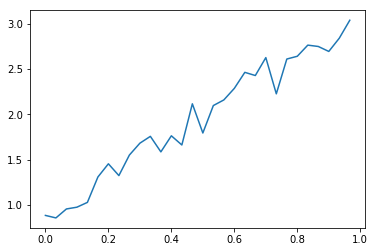

In [4]:
plt.plot(x,y)

In [5]:
# build model: one (dense) layer nn, 1 output node, 1 input node
lm = Sequential([Dense(1, input_shape=(1,))])
# Use stochastic gradient descent (SGD) and Mean Squared Error (MSE) as loss function
lm.compile(optimizer=SGD(lr=0.1), loss='mse') 
lm.model.summary() # 2 fitting parameters a (alpha, intersection), b (beta)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_1 (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             2           dense_input_1[0][0]              
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________________________________________________________________


In [36]:
lm.evaluate(x, y, verbose=0)

0.017564596608281136

In [37]:
lm.fit(x, y, nb_epoch=80, batch_size=30)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0176
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0176
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0175
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 12/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 13/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 14/80
30/30 [==============================] - 0s - loss: 0.0174
Epoch 15/80
30/

In [38]:
a = lm.get_weights()[1][0]; b = lm.get_weights()[0][0][0]

In [39]:
def lin(a,b,x): return a + b * x

In [40]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a, b, x))
plt.close()

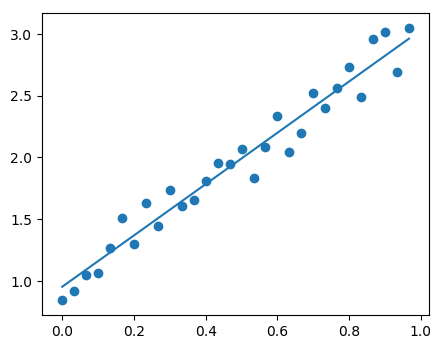

In [41]:
fig

In [43]:
a

0.95207882

## Multiple linear regression: (x1, x2) -> y

In [45]:
# 30 by 2 matrix containing x1 and x2 in its two columns
x = np.transpose(np.array((range(30), permutation(range(30))))/30.)

In [98]:
# Add a small perturbation over perfect linear relationship bwn indep vars (x1,x2) and the response (y)
d = (random(30) - 0.5)/2.
# Response variable
y = np.matmul(x, [2., 3.]) + 1. + d

In [99]:
x[:5]

array([[ 0.    ,  0.9333],
       [ 0.0333,  0.    ],
       [ 0.0667,  0.9   ],
       [ 0.1   ,  0.3   ],
       [ 0.1333,  0.5667]])

In [100]:
# Set up 1-layer neural network, 1 output and 2 input neurons
lm2 = Sequential([Dense(1, input_shape=(2,))])
# Use stochastic gradient descent (SGD),  and mean squared error (MSE) loss; MSE is *terrible* loss fn for optimization
lm2.compile(optimizer=SGD(lr=0.1), loss='mse')

In [105]:
lm2.evaluate(x, y, verbose=0)

0.041306339204311371

In [118]:
%time lm2.fit(x, y, nb_epoch=80, batch_size=900)

Epoch 1/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 2/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 3/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 4/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 5/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 6/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 7/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 8/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 9/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 10/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 11/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 12/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 13/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 14/80
30/30 [==============================] - 0s - loss: 0.0169
Epoch 15/80
30/

In [119]:
lm2.evaluate(x, y, verbose=0)

0.016848349943757057

In [120]:
lm2.get_weights() # MSE cannot get the fitting parameters right

[array([[ 2.097 ],
        [ 2.9163]], dtype=float32), array([ 1.0033], dtype=float32)]

In [122]:
lm2.model.summary() # 3 parameters a, b1, b2

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_5 (InputLayer)       (None, 2)             0                                            
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 1)             3           dense_input_5[0][0]              
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________


# Kaggle 2017 Data Science Bowl

In [3]:
vgg = Vgg16().model

/Users/szalmaf/anaconda/envs/kaggle2017-2.7/lib/python2.7/site-packages/keras/layers/core.py:622: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [4]:
vgg.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [5]:
data_root = '/Users/szalmaf/Documents/GitHub/Training Python/Kaggle_Data_Science_Bowl_2017/'

In [6]:
all_labels = pd.read_csv(data_root + 'labeled_patients_labels.csv')
trn_labels = onehot(np.array(np.int32(all_labels['cancer'][280:])))
val_labels = onehot(np.array(np.int32(all_labels['cancer'][:280])))
val_labels.shape

In [30]:
resArr = load_array('/Users/szalmaf/Documents/GitHub/Training Python/Kaggle_Data_Science_Bowl_2017/labeled_patient_collapsed_images-1397x3x224x224.bc')

In [31]:
resArr.shape

(1397, 3, 224, 224)

In [32]:
trn = resArr[280:]

In [33]:
val = resArr[:280]

In [34]:
val.shape

(280, 3, 224, 224)

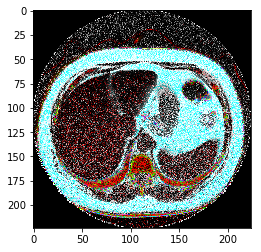

In [35]:
plot(val[4])

In [36]:
vgg.pop();vgg.pop();vgg.pop();vgg.pop();vgg.pop();vgg.pop();vgg.pop();

In [37]:
vgg.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
conv_val_feat = vgg.predict(val, batch_size=2, verbose=1)
conv_trn_feat = vgg.predict(trn, batch_size=2, verbose=1)

1117/1117 [==============================] - 683s     

In [40]:
conv_trn_feat.shape, conv_val_feat.shape

((1117, 512, 28, 28), (280, 512, 28, 28))

In [41]:
vgg.input_shape, vgg.output_shape

((None, 3, 224, 224), (None, 512, 28, 28))

In [42]:
conv_layers,_ = split_at(vgg, Convolution2D)

In [43]:
conv_layers[-1].output_shape[1:]

(512, 28, 28)

In [44]:
nf=128; p=0

In [104]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((2,2)),
        Convolution2D(2,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [105]:
lrg_model = Sequential(get_lrg_layers())

In [106]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 28, 28), (None, 2))

In [122]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
batchnormalization_4 (BatchNorma (None, 512, 28, 28)   2048        batchnormalization_input_2[0][0] 
____________________________________________________________________________________________________
convolution2d_17 (Convolution2D) (None, 128, 28, 28)   589952      batchnormalization_4[0][0]       
____________________________________________________________________________________________________
batchnormalization_5 (BatchNorma (None, 128, 28, 28)   512         convolution2d_17[0][0]           
____________________________________________________________________________________________________
maxpooling2d_8 (MaxPooling2D)    (None, 128, 14, 14)   0           batchnormalization_5[0][0]       
___________________________________________________________________________________________

In [108]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))

Train on 1117 samples, validate on 280 samples
Epoch 1/1
1117/1117 [==============================] - 84s - loss: 0.6672 - acc: 0.7153 - val_loss: 0.5895 - val_acc: 0.7464

In [90]:
lrg_model.optimizer.lr = 0.00001

In [91]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=10, 
              validation_data=(conv_val_feat, val_labels))

Train on 1117 samples, validate on 280 samples
Epoch 1/10
1117/1117 [==============================] - 77s - loss: 0.5739 - acc: 0.7395 - val_loss: 0.5672 - val_acc: 0.7464

In [92]:
unresArr198 = load_array('/Users/szalmaf/Documents/GitHub/Training Python/Kaggle_Data_Science_Bowl_2017/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [93]:
type(unresArr198[0][0][0][0])

numpy.int64

In [94]:
unlabeledPredictionvgg = vgg.predict(unresArr198, batch_size=8, verbose=1)

198/198 [==============================] - 84s     

In [95]:
unlabeledPrediction = lrg_model.predict(unlabeledPredictionvgg, batch_size=8, verbose=1)

198/198 [==============================] - 4s     

In [96]:
unlabeledPrediction_df = pd.DataFrame(unlabeledPrediction[:,1], columns=['cancer'])

In [97]:
unlabeledPrediction_df

,cancer
0,0.25978
1,0.25978
2,0.25978
3,0.25978
4,0.25978
5,0.25978
6,0.25978
7,0.25978
8,0.25978
9,0.25978


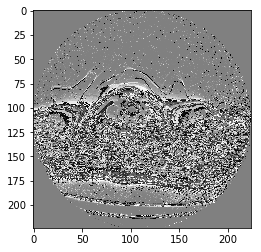

In [89]:
plt.imshow(sum(unresArr198[105]), cmap=plt.cm.gray)
plt.show()

In [98]:
unlabeledIds = pd.read_csv(data_root + 'unlabeledPatients.csv', index_col=0)

In [99]:
submission_df = pd.concat([unlabeledIds, unlabeledPrediction_df], axis=1)

In [100]:
submission_df

,id,cancer
0,026470d51482c93efc18b9803159c960,0.25978
1,031b7ec4fe96a3b035a8196264a8c8c3,0.25978
2,03bd22ed5858039af223c04993e9eb22,0.25978
3,06a90409e4fcea3e634748b967993531,0.25978
4,07b1defcfae5873ee1f03c90255eb170,0.25978
5,0b20184e0cd497028bdd155d9fb42dc9,0.25978
6,12db1ea8336eafaf7f9e3eda2b4e4fef,0.25978
7,159bc8821a2dc39a1e770cb3559e098d,0.25978
8,174c5f7c33ca31443208ef873b9477e5,0.25978
9,1753250dab5fc81bab8280df13309733,0.25978


In [101]:
submission_df.to_csv(data_root + 'white_noise.csv', index=False)

In [102]:
!pwd

/Users/szalmaf/Documents/GitHub/Training Statistics/fastai_Deep-Learning/mySolution


In [119]:
l = ['a','b','c']
ll = dict(enumerate(l,10))

In [120]:
ll

{10: 'a', 11: 'b', 12: 'c'}

In [125]:
sum(all_labels['cancer'])/len(all_labels)

0.25912670007158195

In [3]:
!pwd

/Users/szalmaf/Documents/GitHub/Training Statistics/fastai_Deep-Learning/mySolution


In [ ]:
!less .gitignore

.ipynb_checkpoints/
*.pyc
.gitignore (END)